# Random Forest Exercise Solution


In [1]:
from sklearn.datasets import load_iris
iris = load_iris()   # storing dataset
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [2]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names) # making dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
from sklearn.model_selection import train_test_split # splitting dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),iris.target,test_size=0.2)

In [5]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier() #  here, n_estimators=100 by default
model.fit(X_train, y_train)  # Training

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
model.score(X_test,y_test) # 96.6% accuracy

0.9666666666666667

### Tuning

In [9]:
model = RandomForestClassifier(n_estimators=250) # 96.6% is optimal score
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9666666666666667

### Confusion Matrix

In [10]:
y_predicted = model.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 7,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 12]], dtype=int64)

Text(69.0, 0.5, 'Truth')

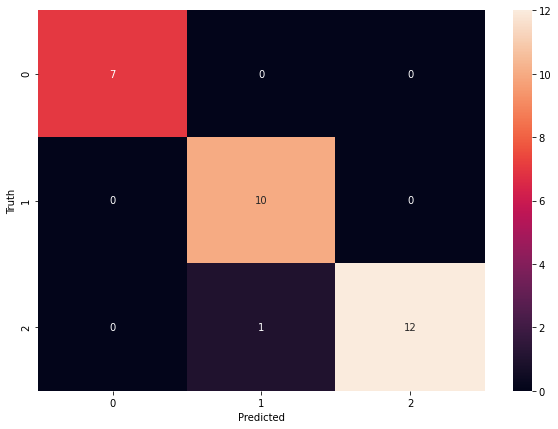

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns  # Visualize confusion maatrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')